# Natural Language Processing

## Spacy

### Model & Document

In [1]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en_core_web_sm')

# Create a Doc object
doc = nlp(u'Tesla is looking at buying U.S. startup for $6 million')

# Print each token separately
for token in doc:
    print(
        token.text, 
        token.pos_, # Part of speech the token is
        token.dep_ # Syntacti dependency
    )

Tesla PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.S. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
6 NUM compound
million NUM pobj


After importing the spacy module in the cell above we loaded a **model** and named it `nlp`.<br>Next we created a **Doc** object by applying the model to our text, and named it `doc`.<br>spaCy also builds a companion **Vocab** object that we'll cover in later sections.<br>The **Doc** object that holds the processed text is our focus here.


When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.
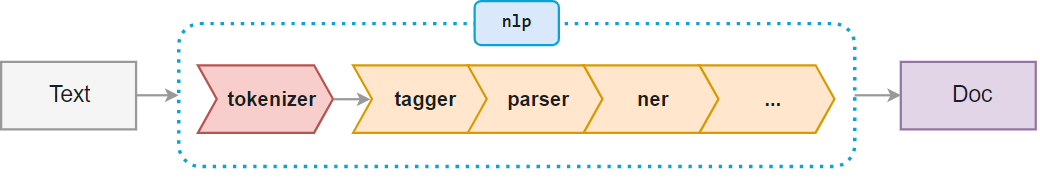

We can check to see what components currently live in the pipeline. In later sections we'll learn how to disable components and add new ones as needed.

In [2]:
nlp.pipeline

[('tagger', <spacy.pipeline.Tagger at 0x237cb1e8f98>),
 ('parser', <spacy.pipeline.DependencyParser at 0x237cb2852b0>),
 ('ner', <spacy.pipeline.EntityRecognizer at 0x237cb285360>)]

In [3]:
nlp.pipe_names 

['tagger', 'parser', 'ner']

### Spans & Sentences

#### Spans 
Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [16]:
doc3 = nlp(u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [17]:
life_quote = doc3[16:30]
print(life_quote)

"Life is what happens to us while we are making other plans"


In [18]:
type(life_quote)

spacy.tokens.span.Span

In upcoming lectures we'll see how to create Span objects using `Span()`. This will allow us to assign additional information to the Span.

___
#### Sentences
Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. Later we'll write our own segmentation rules.

In [19]:
doc4 = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')

In [20]:
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [21]:
doc4[6].is_sent_start

True

### Tokens
The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information. We'll go into much more detail on tokenization in an upcoming lecture. For now, let's look at another example:

In [4]:
doc2 = nlp(u"Tesla isn't   looking into startups anymore.")

for token in doc2:
    print(token.text, token.pos_, token.dep_)

Tesla PROPN nsubj
is VERB aux
n't ADV neg
   SPACE 
looking VERB ROOT
into ADP prep
startups NOUN pobj
anymore ADV advmod
. PUNCT punct


Notice how `isn't` has been split into two tokens. spaCy recognizes both the root verb `is` and the negation attached to it. Notice also that both the extended whitespace and the period at the end of the sentence are assigned their own tokens.

It's important to note that even though `doc2` contains processed information about each token, it also retains the original text:

In [5]:
doc2

Tesla isn't   looking into startups anymore.

In [6]:
doc2[0]

Tesla

In [7]:
type(doc2)

spacy.tokens.doc.Doc

#### Part-of-Speech Tagging (POS)
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/api/annotation#pos-tagging

In [8]:
doc2[0].pos_

'PROPN'

#### Lemmatization


In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a *morphological analysis* to words. The lemma of 'was' is 'be' and the lemma of 'mice' is 'mouse'. Further, the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence.

In [1]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [2]:
doc1 = nlp(u"I am a runner running in a race because I love to run since I ran today")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 561228191312463089 	 -PRON-
am 	 VERB 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 ADP 	 16950148841647037698 	 because
I 	 PRON 	 561228191312463089 	 -PRON-
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 ADP 	 10066841407251338481 	 since
I 	 PRON 	 561228191312463089 	 -PRON-
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


#### Named Entities


Going a step beyond tokens, *named entities* add another layer of context. The language model recognizes that certain words are organizational names while others are locations, and still other combinations relate to money, dates, etc. Named entities are accessible through the `ents` property of a `Doc` object.

In [14]:
doc8 = nlp(u'Apple to build a Hong Kong factory for $6 million')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | to | build | a | Hong | Kong | factory | for | $ | 6 | million | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - GPE - Countries, cities, states
$6 million - MONEY - Monetary values, including unit


<font color=green>Note how two tokens combine to form the entity `Hong Kong`, and three tokens combine to form the monetary entity:  `$6 million`</font>

In [15]:
len(doc8.ents)

3

Named Entity Recognition (NER) is an important machine learning tool applied to Natural Language Processing.<br>We'll do a lot more with it in an upcoming section. For more info on **named entities** visit https://spacy.io/usage/linguistic-features#named-entities

___
#### Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [12]:
# Lemmas (the base form of the word):
print(doc2[4].text)
print(doc2[4].lemma_)

looking
look


___
### Dependencies
We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

For a full list of Syntactic Dependencies visit https://spacy.io/api/annotation#dependency-parsing
<br>A good explanation of typed dependencies can be found [here](https://nlp.stanford.edu/software/dependencies_manual.pdf)

In [9]:
doc2[0].dep_

'nsubj'

To see the full name of a tag use `spacy.explain(tag)`

In [10]:
spacy.explain('PROPN')

'proper noun'

In [11]:
spacy.explain('nsubj')

'nominal subject'

ner = Named Entity Recognizer

---
### Noun Chunks
Similar to `Doc.ents`, `Doc.noun_chunks` are another object property. *Noun chunks* are "base noun phrases" – flat phrases that have a noun as their head. You can think of noun chunks as a noun plus the words describing the noun – for example, in [Sheb Wooley's 1958 song](https://en.wikipedia.org/wiki/The_Purple_People_Eater), a *"one-eyed, one-horned, flying, purple people-eater"* would be one long noun chunk.

In [16]:
doc9 = nlp(u"Autonomous cars shift insurance liability toward manufacturers.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Autonomous cars
insurance liability
manufacturers


In [17]:
doc10 = nlp(u"Red cars do not carry higher insurance rates.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

Red cars
higher insurance rates


In [18]:
doc11 = nlp(u"He was a one-eyed, one-horned, flying, purple people-eater.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

He
a one-eyed, one-horned, flying, purple people-eater


We'll look at additional noun_chunks components besides `.text` in an upcoming section.<br>For more info on **noun_chunks** visit https://spacy.io/usage/linguistic-features#noun-chunks

### Stop Words
Words like "a" and "the" appear so frequently that they don't require tagging as thoroughly as nouns, verbs and modifiers. We call these *stop words*, and they can be filtered from the text to be processed. spaCy holds a built-in list of some 305 English stop words.

In [ ]:
# Perform standard imports:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Print the set of spaCy's default stop words (remember that sets are unordered):
print(nlp.Defaults.stop_words)

In [ ]:
len(nlp.Defaults.stop_words)

#### To see if a word is a stop word

In [ ]:
nlp.vocab['myself'].is_stop

In [ ]:
nlp.vocab['mystery'].is_stop

#### To add a stop word
There may be times when you wish to add a stop word to the default set. Perhaps you decide that `'btw'` (common shorthand for "by the way") should be considered a stop word.

In [ ]:
# Add the word to the set of stop words. Use lowercase!
nlp.Defaults.stop_words.add('btw')

# Set the stop_word tag on the lexeme
nlp.vocab['btw'].is_stop = True

In [ ]:
len(nlp.Defaults.stop_words)

In [ ]:
nlp.vocab['btw'].is_stop

<font color=green>When adding stop words, always use lowercase. Lexemes are converted to lowercase before being added to **vocab**.</font>

####111 To remove a stop word
Alternatively, you may decide that `'beyond'` should not be considered a stop word.

In [ ]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('beyond')

# Remove the stop_word tag from the lexeme
nlp.vocab['beyond'].is_stop = False

In [ ]:
len(nlp.Defaults.stop_words)

In [ ]:
nlp.vocab['beyond'].is_stop

### Vocab Matching

#### Rule-based Matching
spaCy offers a rule-matching tool called `Matcher` that allows you to build a library of token patterns, then match those patterns against a Doc object to return a list of found matches. You can match on any part of the token including text and annotations, and you can add multiple patterns to the same matcher.

In [1]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')

In [2]:
# Import the Matcher library
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

<font color=green>Here `matcher` is an object that pairs to the current `Vocab` object. We can add and remove specific named matchers to `matcher` as needed.</font>

#### Creating patterns
In literature, the phrase 'solar power' might appear as one word or two, with or without a hyphen. In this section we'll develop a matcher named 'SolarPower' that finds all three:

In [3]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

matcher.add('SolarPower', None, pattern1, pattern2, pattern3)

Let's break this down:
* `pattern1` looks for a single token whose lowercase text reads 'solarpower'
* `pattern2` looks for two adjacent tokens that read 'solar' and 'power' in that order
* `pattern3` looks for three adjacent tokens, with a middle token that can be any punctuation.<font color=green>*</font>

<font color=green>\* Remember that single spaces are not tokenized, so they don't count as punctuation.</font>
<br>Once we define our patterns, we pass them into `matcher` with the name 'SolarPower', and set *callbacks* to `None` (more on callbacks later).

#### Applying the matcher to a Doc object

In [4]:
doc = nlp(u'The Solar Power industry continues to grow as demand \
for solarpower increases. Solar-power cars are gaining popularity.')

In [5]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


`matcher` returns a list of tuples. Each tuple contains an ID for the match, with start & end tokens that map to the span `doc[start:end]`

In [6]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]  # get string representation
    span = doc[start:end]                    # get the matched span
    print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 1 3 Solar Power
8656102463236116519 SolarPower 10 11 solarpower
8656102463236116519 SolarPower 13 16 Solar-power


The `match_id` is simply the hash value of the `string_ID` 'SolarPower'

#### Setting pattern options and quantifiers
You can make token rules optional by passing an `'OP':'*'` argument. This lets us streamline our patterns list:

In [7]:
# Redefine the patterns:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]

# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', None, pattern1, pattern2)

In [8]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


This found both two-word patterns, with and without the hyphen!

The following quantifiers can be passed to the `'OP'` key:
<table><tr><th>OP</th><th>Description</th></tr>

<tr ><td><span >\!</span></td><td>Negate the pattern, by requiring it to match exactly 0 times</td></tr>
<tr ><td><span >?</span></td><td>Make the pattern optional, by allowing it to match 0 or 1 times</td></tr>
<tr ><td><span >\+</span></td><td>Require the pattern to match 1 or more times</td></tr>
<tr ><td><span >\*</span></td><td>Allow the pattern to match zero or more times</td></tr>
</table>


#### Be careful with lemmas!
If we wanted to match on both 'solar power' and 'solar powered', it might be tempting to look for the *lemma* of 'powered' and expect it to be 'power'. This is not always the case! The lemma of the *adjective* 'powered' is still 'powered':

In [9]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LEMMA': 'power'}] # CHANGE THIS PATTERN

# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', None, pattern1, pattern2)

In [10]:
doc2 = nlp(u'Solar-powered energy runs solar-powered cars.')

In [11]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 0, 3)]


<font color=green>The matcher found the first occurrence because the lemmatizer treated 'Solar-powered' as a verb, but not the second as it considered it an adjective.<br>For this case it may be better to set explicit token patterns.</font>

In [12]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solarpowered'}]
pattern4 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'powered'}]

# Remove the old patterns to avoid duplication:
matcher.remove('SolarPower')

# Add the new set of patterns to the 'SolarPower' matcher:
matcher.add('SolarPower', None, pattern1, pattern2, pattern3, pattern4)

In [13]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 0, 3), (8656102463236116519, 5, 8)]


#### Other token attributes
Besides lemmas, there are a variety of token attributes we can use to determine matching rules:
<table><tr><th>Attribute</th><th>Description</th></tr>

<tr ><td><span >`ORTH`</span></td><td>The exact verbatim text of a token</td></tr>
<tr ><td><span >`LOWER`</span></td><td>The lowercase form of the token text</td></tr>
<tr ><td><span >`LENGTH`</span></td><td>The length of the token text</td></tr>
<tr ><td><span >`IS_ALPHA`, `IS_ASCII`, `IS_DIGIT`</span></td><td>Token text consists of alphanumeric characters, ASCII characters, digits</td></tr>
<tr ><td><span >`IS_LOWER`, `IS_UPPER`, `IS_TITLE`</span></td><td>Token text is in lowercase, uppercase, titlecase</td></tr>
<tr ><td><span >`IS_PUNCT`, `IS_SPACE`, `IS_STOP`</span></td><td>Token is punctuation, whitespace, stop word</td></tr>
<tr ><td><span >`LIKE_NUM`, `LIKE_URL`, `LIKE_EMAIL`</span></td><td>Token text resembles a number, URL, email</td></tr>
<tr ><td><span >`POS`, `TAG`, `DEP`, `LEMMA`, `SHAPE`</span></td><td>The token's simple and extended part-of-speech tag, dependency label, lemma, shape</td></tr>
<tr ><td><span >`ENT_TYPE`</span></td><td>The token's entity label</td></tr>

</table>

#### Token wildcard
You can pass an empty dictionary `{}` as a wildcard to represent **any token**. For example, you might want to retrieve hashtags without knowing what might follow the `#` character:
>`[{'ORTH': '#'}, {}]`

#### Regular Expressions

<img src="./images/regex_cheat_sheet.png">

#### Viewing Matches
There are a few ways to fetch the text surrounding a match. The simplest is to grab a slice of tokens from the doc that is wider than the match:

In [20]:
doc3[665:685]  # Note that the fifth match starts at doc3[673]

same time he attracted a following from the supply-side economics movement, which formed in opposition to Keynesian

In [21]:
doc3[2975:2995]  # The sixth match starts at doc3[2985]

against institutions.[66] His policies became widely known as "trickle-down economics", due to the significant

Another way is to first apply the `sentencizer` to the Doc, then iterate through the sentences to the match point:

In [22]:
# Build a list of sentences
sents = [sent for sent in doc3.sents]

# In the next section we'll see that sentences contain start and end token values:
print(sents[0].start, sents[0].end)

0 35


In [23]:
# Iterate over the sentence list until the sentence end value exceeds a match start value:
for sent in sents:
    if matches[4][1] < sent.end:  # this is the fifth match, that starts at doc3[673]
        print(sent)
        break

At the same time he attracted a following from the supply-side economics movement, which formed in opposition to Keynesian demand-stimulus economics.


___
#### PhraseMatcher
In the above section we used token patterns to perform rule-based matching. An alternative - and often more efficient - method is to match on terminology lists. In this case we use PhraseMatcher to create a Doc object from a list of phrases, and pass that into `matcher` instead.

In [14]:
# Perform standard imports, reset nlp
import spacy
nlp = spacy.load('en_core_web_sm')

In [15]:
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

For this exercise we're going to import a Wikipedia article on *Reaganomics*<br>
Source: https://en.wikipedia.org/wiki/Reaganomics

In [16]:
with open('../TextFiles/reaganomics.txt', encoding='utf8') as f:
    doc3 = nlp(f.read())

In [17]:
# First, create a list of match phrases:
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

# Next, convert each phrase to a Doc object:
phrase_patterns = [nlp(text) for text in phrase_list]

# Pass each Doc object into matcher (note the use of the asterisk!):
matcher.add('VoodooEconomics', None, *phrase_patterns)

# Build a list of matches:
matches = matcher(doc3)

In [18]:
# (match_id, start, end)
matches

[(3473369816841043438, 41, 45),
 (3473369816841043438, 49, 53),
 (3473369816841043438, 54, 56),
 (3473369816841043438, 61, 65),
 (3473369816841043438, 673, 677),
 (3473369816841043438, 2985, 2989)]

### Spacy Visualizations

In [ ]:
from spacy import displacy

In [ ]:
doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

#### Visualizing the dependency parse
Run the cell below to import displacy and display the dependency graphic

In [19]:
from spacy import displacy

doc = nlp(u'Apple is going to build a U.K. factory for $6 million.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

The optional `'distance'` argument sets the distance between tokens. If the distance is made too small, text that appears beneath short arrows may become too compressed to read.

#### Visualizing the entity recognizer

In [20]:
doc = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for a profit of $6 million.')
displacy.render(doc, style='ent', jupyter=True)

___
#### Creating Visualizations Outside of Jupyter
If you're using another Python IDE or writing a script, you can choose to have spaCy serve up html separately:

In [21]:
doc = nlp(u'This is a sentence.')
displacy.serve(doc, style='dep')


    Serving on port 5000...
    Using the 'dep' visualizer


    Shutting down server on port 5000.



<font color=blue>**After running the cell above, click the link below to view the dependency parse**:</font>

http://127.0.0.1:5000
<br><br>
<font color=red>**To shut down the server and return to jupyter**, interrupt the kernel either through the **Kernel** menu above, by hitting the black square on the toolbar, or by typing the keyboard shortcut `Esc`, `I`, `I`</font>

## NLTK

### Tokenize

In [1]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(some_text_data)

### Stop Words

In [ ]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

stopwords_list = stopwords.words('english')

stopwords_list += list(string.punctuation)

stopwords_list += [str(i) for i in range(0,10)]

macbeth_words_stopped = [word for word in macbeth_tokens if word not in stopwords_list]

### Frequency Distributions

In [ ]:
nltk.FreqDist()

macbeth_stopped_freqdist = FreqDist(macbeth_words_stopped)

macbeth_stopped_freqdist.most_common(50)

### Stemming
Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for "boat" might also return "boats" and "boating". Here, "boat" would be the **stem** for [boat, boater, boating, boats].

Stemming is a somewhat crude method for cataloging related words; it essentially chops off letters from the end until the stem is reached. This works fairly well in most cases, but unfortunately English has many exceptions where a more sophisticated process is required. In fact, spaCy doesn't include a stemmer, opting instead to rely entirely on lemmatization. For those interested, there's some background on this decision [here](https://github.com/explosion/spaCy/issues/327). We discuss the virtues of *lemmatization* in the next section.

Instead, we'll use another popular NLP tool called **nltk**, which stands for *Natural Language Toolkit*. For more information on nltk visit https://www.nltk.org/

#### Porter Stemmer

One of the most common - and effective - stemming tools is [*Porter's Algorithm*](https://tartarus.org/martin/PorterStemmer/) developed by Martin Porter in [1980](https://tartarus.org/martin/PorterStemmer/def.txt). The algorithm employs five phases of word reduction, each with its own set of mapping rules. In the first phase, simple suffix mapping rules are defined, such as:

![stemming1.png](../stemming1.png)

From a given set of stemming rules only one rule is applied, based on the longest suffix S1. Thus, `caresses` reduces to `caress` but not `cares`.

More sophisticated phases consider the length/complexity of the word before applying a rule. For example:

![stemming1.png](../stemming2.png)

Here `m>0` describes the "measure" of the stem, such that the rule is applied to all but the most basic stems.

In [1]:
# Import the toolkit and the full Porter Stemmer library
import nltk

from nltk.stem.porter import *

In [2]:
p_stemmer = PorterStemmer()

In [3]:
words = ['run','runner','running','ran','runs','easily','fairly']

In [4]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fairli


<font color=green>Note how the stemmer recognizes "runner" as a noun, not a verb form or participle. Also, the adverbs "easily" and "fairly" are stemmed to the unusual root "easili" and "fairli"</font>
___

#### Snowball Stemmer
This is somewhat of a misnomer, as Snowball is the name of a stemming language developed by Martin Porter. The algorithm used here is more acurately called the "English Stemmer" or "Porter2 Stemmer". It offers a slight improvement over the original Porter stemmer, both in logic and speed. Since **nltk** uses the name SnowballStemmer, we'll use it here.

In [5]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

In [6]:
words = ['run','runner','running','ran','runs','easily','fairly']
# words = ['generous','generation','generously','generate']

In [7]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

run --> run
runner --> runner
running --> run
ran --> ran
runs --> run
easily --> easili
fairly --> fair


<font color=green>In this case the stemmer performed the same as the Porter Stemmer, with the exception that it handled the stem of "fairly" more appropriately with "fair"</font>
___

## SciKit Learn

### Vectorizing                                                                                                                                                                                                                                                                                                         y

#### Count Vectorizer

In [ ]:
#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(docs)

#### TF-IDF Vectorization

- If the word is used often in many other documents, it is not unique, and therefore probably not too useful if we wanted to figure out how this document is unique in relation to other documents. 

- Conversely, if a word is used many times in a document, but rarely in all the other documents we are considering, then it is likely a good indicator for telling us that this word is important to the document in question.  

The formula TF-IDF uses to determine the weights of each term in a document is **_Term Frequency_** multiplied by **_Inverse Document Frequency_**, where the formula for Term Frequency is:

$$\large Term\ Frequency(t) = \frac{number\ of\ times\ t\ appears\ in\ a\ document} {total\ number\ of\ terms\ in\ the\ document} $$

The formula for Inverse Document Frequency is:  
<br>  
<br>
$$\large  IDF(t) =  log_e(\frac{Total\ Number\ of\ Documents}{Number\ of\ Documents\ with\ t\ in\ it})$$



In [ ]:
new_vect = TfidfVectorizer()

df3_tfvect = new_vect.fit_transform(df3_selection['fd_text'])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

# Linear SVC:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

### Topic Modeling

#### t-SNE

In [ ]:
t_sne_object_3d = TSNE(n_components=3)
transformed_data_3d = t_sne_object_3d.fit_transform(tf_idf_vals_list)

#### Latent Dirichlet Allocation

In [ ]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    # Max df: ignore words that have really high doc frequency
        # between 0 and 1
    # Min df: words that show up a minimum number of times
        # integer value is raw num of docs that must have word for it to be counted
        
    

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
LDA = LatentDirichletAllocation(n_components=7,random_state=42)

Assigning LDA topic to original documents

In [ ]:
# grab Vocab of words
# found in cv objectr
cv.get_feature_names()  # Hold instaces of every word. 
                        # List of all words in all docs (1d)

In [ ]:
# Grab topics from LDA

LDA.components_    # Numpy array wtih probabilites for each word
                    # Rows are topics, cols are names
    
LDA.components[0].argsort() # returns the indices that would sort row
                            # smallest to largest


top_word_indices = single_topic.argsort()[-10:]

# use indexes to slice cv list. 

for index in top_word_indices:
    print(cv.get_feature_names()[index])
    
# OR: Use list comprehension

for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

In [ ]:
# add topics to original 

topic_results = lda.transform(dtm) # fit to the vectorized matrix 
                                    # that the lda was fit on
                # returns array with rows = documents, columns = prob doc belogns to a doc

topic_results[0].argmax() # returns topic of highest probability

# add topic as column
npr['Topic'] = topic_results.argmax(axis=1)


#### Non-negative matrix factorizatation